In [1]:
######## import all necessity functions ##########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, silhouette_score

In [2]:
####### Import all necessity function for Deep Learning ########
import os
import cv2
import random 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout, Conv2D, MaxPool2D, MaxPool3D, Flatten
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MSE, MAE, Huber
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam

In [3]:
####### To acess the Google Drive ########
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
####### To unzip the folder which is stored in the Google Drive ########
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN Dataset/StrawberryLeaf.zip", 'r')
zip_ref.extractall()
zip_ref.close()
print("Upzip is done successfully.")

Upzip is done successfully.


In [5]:
####### To extract those images from the Google Drive #######
data_, categories_, directory_ = [], ['Strawberry___Leaf_scorch', 'Strawberry___healthy'], "/content/StrawberryLeaf"
####### run a loop and extract the images #######
for eachCategories_ in categories_:
  folderPath_ = os.path.join(directory_, eachCategories_)
  ######## For extract each images ########
  for image_ in os.listdir(folderPath_):
    ######## target value appending #######
    targetLabel_   = categories_.index(eachCategories_)
    eachImagePath_ = os.path.join(folderPath_, image_)
    eachImageRead_ = cv2.imread(eachImagePath_)
    ######## Resize the image #########
    imageVector_   = cv2.resize(eachImageRead_, (100, 100))
    ######## appending the data in the data_ ########
    data_.append([imageVector_, targetLabel_])
  
  print(f"{eachCategories_} is completed successfully.\n")

print("Done with all.")
######## Random suffle the data #######
random.shuffle(data_)
print("Data shuffle is done.")

Strawberry___Leaf_scorch is completed successfully.

Strawberry___healthy is completed successfully.

Done with all.
Data shuffle is done.


In [6]:
####### Split the dataset into X and y #######
X, y = [], []
####### Run the loop and append data in X and y #######
for value_ in data_:
  X.append(value_[0])
  y.append(value_[1])

print("X and y appending is done.")

X and y appending is done.


In [7]:
####### Normalised the X #######
X = np.array(X)
y = np.array(y)
X = X/255
print("Normalised is done.")

Normalised is done.


In [8]:
####### train and test split the data #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(f"X_train shape is {X_train.shape}")
print(f"X_test shape is  {X_test.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"y_test shape is  {y_test.shape}")

X_train shape is (1252, 100, 100, 3)
X_test shape is  (313, 100, 100, 3)
y_train shape is (1252,)
y_test shape is  (313,)


Create a SEQUENTIAL model with CNN 


In [9]:
####### Create a model #######
model = Sequential()

####### Create first Convolution Layer with filters 128 and MaxPooling 2,2 ######
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = (X.shape[1:])))
model.add(MaxPool2D(2,2))

####### Create second Convolution Layer with filters 128 and MaxPooling 2,2 ######
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
####### Use Dropout Layer with ratio 0.6 #######
model.add(Dropout(0.6))

####### Create third Convolution Layer with filters 64 and MaxPooling 2,2 ######
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))

####### Flatten the model ########
model.add(Flatten())

####### Create first hidden layer with neurons 128 #######
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))
####### Use Dropout Layer with ratio 0.6 #######
model.add(Dropout(0.6))
####### Create second hidden layer with neurons 128 #######
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.5))


####### Create the output layer ########
model.add(Dense(units = 1, activation = 'sigmoid'))

####### Compile the model #######
model.compile(optimizer = 'Adam', loss = BinaryCrossentropy(), metrics = ['accuracy'])

####### fit the model ########
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 128, verbose = 1)

Epoch 1/50
10/10 [==============================] - 4s 141ms/step - loss: 0.6085 - accuracy: 0.6581 - val_loss: 0.5847 - val_accuracy: 0.6933
Epoch 2/50
10/10 [==============================] - 1s 66ms/step - loss: 0.4315 - accuracy: 0.7093 - val_loss: 0.4697 - val_accuracy: 0.6933
Epoch 3/50
10/10 [==============================] - 1s 66ms/step - loss: 0.3347 - accuracy: 0.8035 - val_loss: 0.2720 - val_accuracy: 0.9457
Epoch 4/50
10/10 [==============================] - 1s 66ms/step - loss: 0.2316 - accuracy: 0.9249 - val_loss: 0.2016 - val_accuracy: 0.9744
Epoch 5/50
10/10 [==============================] - 1s 66ms/step - loss: 0.1515 - accuracy: 0.9569 - val_loss: 0.2699 - val_accuracy: 0.8914
Epoch 6/50
10/10 [==============================] - 1s 66ms/step - loss: 0.1622 - accuracy: 0.9473 - val_loss: 0.0782 - val_accuracy: 0.9840
Epoch 7/50
10/10 [==============================] - 1s 66ms/step - loss: 0.0831 - accuracy: 0.9752 - val_loss: 0.0573 - val_accuracy: 0.9840
Epoch 8/50
1

In [10]:
######## print the model performance #########
predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)
print("Accuracy score is  = ", accuracy_score(predicted_, y_test))
print("precision score is = ", precision_score(predicted_, y_test))
print("recall score is    = ", recall_score(predicted_, y_test))
print("f1_score score is  = ", f1_score(predicted_, y_test))

Accuracy score is  =  1.0
precision score is =  1.0
recall score is    =  1.0
f1_score score is  =  1.0


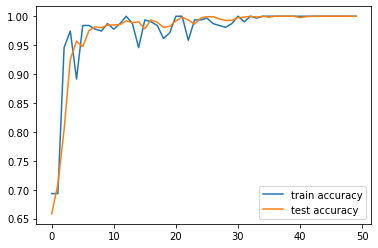

In [11]:
######## print the val_accuracy and accuracy #########
plt.plot(history_.history['val_accuracy'], label = 'train accuracy')
plt.plot(history_.history['accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

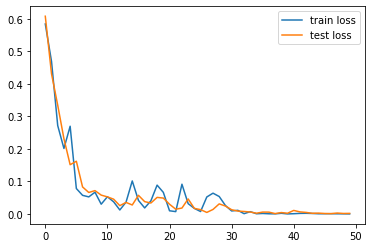

In [12]:
######## print the val_loss and loss #########
plt.plot(history_.history['val_loss'], label = 'train loss')
plt.plot(history_.history['loss'], label = 'test loss')
plt.legend()
plt.show()

Functional Model in CNN


In [17]:
####### Import all functions for this Functional ########
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

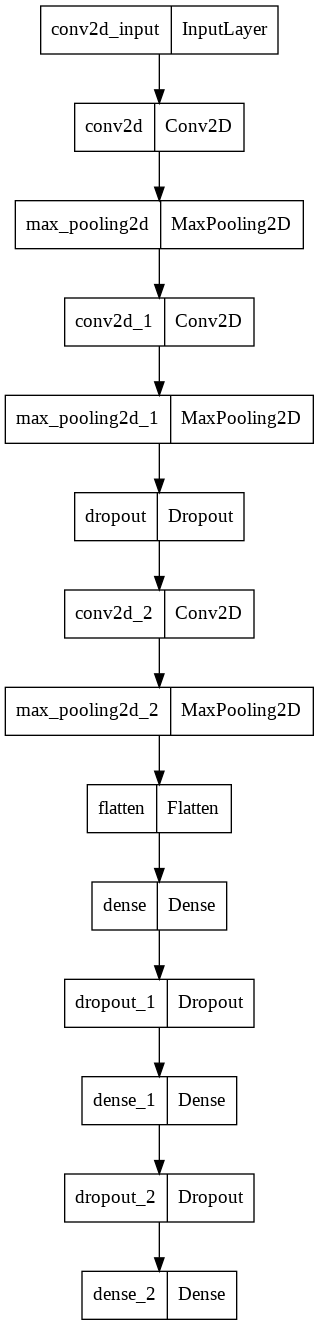

In [24]:
from keras.backend import concatenate
####### Create an input Layer ########
inputLayer_ = Input(X.shape[1:])

####### left Convolution layer 1 #######
Conv2D_1left_ = Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', kernel_initializer = HeNormal())(inputLayer_)
####### Pooling Layer #######
Conv2D_1left_  = MaxPool2D(pool_size = (2, 2))(Conv2D_1left_)
####### right Convolution layer 1 #######
Conv2D_1right_= Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', kernel_initializer = HeNormal())(inputLayer_)
####### Pooling Layer #######
Conv2D_1right_  = MaxPool2D(pool_size = (2, 2))(Conv2D_1right_)

####### left Convolution layer 2 #######
Conv2D_2left_ = Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', kernel_initializer = HeNormal())(Conv2D_1left_)
# Conv2D_2left_ = Dropout(0.6)(Conv2D_2left_)
####### left Convolution layer 2 #######
Conv2D_2right_= Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', kernel_initializer = HeNormal())(Conv2D_1right_)
# Conv2D_2right_ = Dropout(0.5)(Conv2D_2right_)
######## flatten the left #######
falttenLeft_ = Flatten()(Conv2D_2left_)

######## flatten the right #######
falttenRight_ = Flatten()(Conv2D_2right_)

####### Concatenate #######
merge_ = concatenate([falttenLeft_, falttenRight_])

####### first Hidden layer #######
hidden1_ = Dense(units = 128, activation = 'relu', kernel_initializer = HeNormal())(merge_)
hidden1_ = Dropout(0.6)(hidden1_)
####### output layer ########
output = Dense(units = 1, activation = 'sigmoid')(hidden1_)


model_ = Model(inputs = inputLayer_, outputs = output)
plot_model(model)

In [15]:
####### Compile the model #######
model_.compile(optimizer = 'Adam', loss = BinaryCrossentropy(), metrics = ['accuracy'])

####### fit the model ########
history_ = model_.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 128, verbose = 1)

Epoch 1/50
10/10 [==============================] - 2s 144ms/step - loss: 13.3030 - accuracy: 0.6190 - val_loss: 0.7063 - val_accuracy: 0.6933
Epoch 2/50
10/10 [==============================] - 1s 106ms/step - loss: 0.6204 - accuracy: 0.7141 - val_loss: 0.6289 - val_accuracy: 0.6933
Epoch 3/50
10/10 [==============================] - 1s 105ms/step - loss: 0.5776 - accuracy: 0.7133 - val_loss: 0.4960 - val_accuracy: 0.6933
Epoch 4/50
10/10 [==============================] - 1s 106ms/step - loss: 0.4291 - accuracy: 0.7284 - val_loss: 0.3457 - val_accuracy: 0.7540
Epoch 5/50
10/10 [==============================] - 1s 106ms/step - loss: 0.2998 - accuracy: 0.7883 - val_loss: 0.2567 - val_accuracy: 0.8850
Epoch 6/50
10/10 [==============================] - 1s 109ms/step - loss: 0.2128 - accuracy: 0.8858 - val_loss: 0.1712 - val_accuracy: 0.9617
Epoch 7/50
10/10 [==============================] - 1s 111ms/step - loss: 0.1561 - accuracy: 0.9569 - val_loss: 0.0843 - val_accuracy: 0.9776
Epoch